In [1]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def brownian_motion(df, u, sigma):  
    dt = 1/360
    new_price = df.loc[df.index[-1]][0]*(1+u*dt + sigma * np.random.normal(0, 1) * np.sqrt(dt))
    df.loc[df.index[-1]+1] = new_price


def create_orders(market_price,b, side):
    if side == 'buy':
        n = rd.randint(1,b)
        buy_orders_price = [market_price*(1-i/200) for i in range(n)]
        buy_orders_size = [rd.randint(1, i**2) for i in range(1,n+1)]
        return pd.DataFrame({'Price': buy_orders_price, 'Size':buy_orders_size})

    if side == 'sell':
        n = rd.randint(1,b)
        sell_orders_price = [market_price*(1+i/200) for i in range(n)]
        sell_orders_size = [rd.randint(1, i**2) for i in range(1,n+1)]
        return pd.DataFrame({'Price': sell_orders_price, 'Size':sell_orders_size})  

def match_orders(i):
    global order_book_b, order_book_s,trades, trade_n
    try:
        while min(order_book_s['Price']) <= max(order_book_b['Price']):
            trade_n += 1 
            if order_book_b['Price'][0] >= order_book_s['Price'][0]:
                price = (order_book_s['Price'][0]+order_book_b['Price'][0])/2
                size = min(order_book_b['Size'][0], order_book_s['Size'][0])
                trades = trades.append(pd.DataFrame({'Price':price, 'Size':size, 'MP':i}, index=[trade_n]))

                order_book_b.loc[0,'Size'] -= size 
                order_book_s.loc[0,'Size'] -= size 
                
                if order_book_b.loc[0,'Size'] == 0:
                    order_book_b = order_book_b.drop(0).reset_index(drop=True)
                    
                if order_book_s.loc[0,'Size'] == 0:
                    order_book_s = order_book_s.drop(0).reset_index(drop=True)
    except:
        print('No orders to match')

In [59]:
trade_n = 0
b = 2
spreads = []
for i in range(1000):
    price_series = pd.DataFrame(100,columns=['price'], index=[0])

    order_book_b = pd.DataFrame(create_orders(price_series.price[0], b, 'buy'), columns=['Price', 'Size']).sort_values(by=['Price'], ascending=False).reset_index(drop=True)
    order_book_s = pd.DataFrame(create_orders(price_series.price[0], b, 'sell'), columns=['Price', 'Size']).sort_values(by=['Price']).reset_index(drop=True)

    trades = pd.DataFrame(columns=['Price','Size', 'MP'])

    for i in range(30):
        brownian_motion(price_series, 0, 0.2)
        price = price_series.price.iloc[-1]

        new_buy_orders = create_orders(price, b, 'buy')
        order_book_b = order_book_b.append(new_buy_orders).sort_values(by=['Price'], ascending=False).reset_index(drop=True)

        new_sell_orders = create_orders(price, b, 'sell')
        order_book_s = order_book_s.append(new_sell_orders).sort_values(by=['Price']).reset_index(drop=True)

        match_orders(price)
    spreads.append(((trades['Price']/trades['MP'])-1).mean())

In [60]:
#1000 con intervalo 2, vol 0.2
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.0178%
90% Percentile: 0.7879%
10% Percentile: -1.7086%
Total trades: 43801
Bands amplitude: 2.4966%


In [55]:
#1000 con intervalo 10, vol 0.2
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.107%
90% Percentile: 2.0531%
10% Percentile: -3.2029%
Total trades: 118807
Bands amplitude: 5.256%


In [53]:
#1000 con intervalo 5, vol 0.2
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.0835%
90% Percentile: 1.4513%
10% Percentile: -3.0045%
Total trades: 81820
Bands amplitude: 4.4557%


In [51]:
#1000 con intervalo 5, vol 0.1
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.021%
90% Percentile: 0.8858%
10% Percentile: -1.6553%
Total trades: 60738
Bands amplitude: 2.5411%


In [49]:
#1000 con intervalo 2, vol 0.5
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.1039%
90% Percentile: 1.7654%
10% Percentile: -3.962%
Total trades: 46417
Bands amplitude: 5.7275%


In [46]:
#1000 con intervalo 5, vol 0.5
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.1756%
90% Percentile: 2.7098%
10% Percentile: -5.669%
Total trades: 103234
Bands amplitude: 8.3788%


In [43]:
#1000 con intervalo 10, vol 0.5
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.1544%
90% Percentile: 3.7864%
10% Percentile: -6.3987%
Total trades: 175296
Bands amplitude: 10.1851%


In [36]:
#1000 con intervalo 2, vol 0.1
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.0002%
90% Percentile: 0.4449%
10% Percentile: -0.9336%
Total trades: 39911
Bands amplitude: 1.3786%


In [34]:
#1000 con intervalo 10, vol 0.1
print(f'Mean: {round(sum(spreads)/len(spreads)*100,4)}%')
print(f'90% Percentile: {round(np.percentile(np.array(spreads), 90)*100,4)}%')
print(f'10% Percentile: {round(np.percentile(np.array(spreads), 0.1)*100,4)}%')
print(f'Total trades: {trade_n}')
print(f'Bands amplitude: {round((np.percentile(np.array(spreads), 90)-np.percentile(np.array(spreads), 0.1))*100,4)}%')

Mean: 0.0611%
90% Percentile: 1.0319%
10% Percentile: -2.0207%
Total trades: 71646
Bands amplitude: 3.0526%


<AxesSubplot:title={'center':'Distribucion del spread en las simulaciones'}, ylabel='Density'>

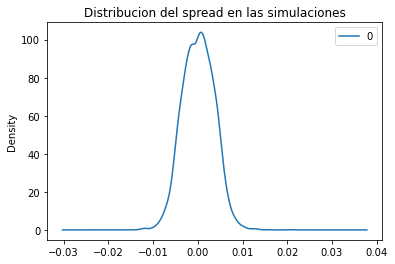

In [40]:
#intervalo 2 y vol 10%
pd.DataFrame(spreads).plot(kind='density', title='Distribucion del spread en las simulaciones')

<AxesSubplot:title={'center':'Distribucion del spread en las simulaciones'}, ylabel='Density'>

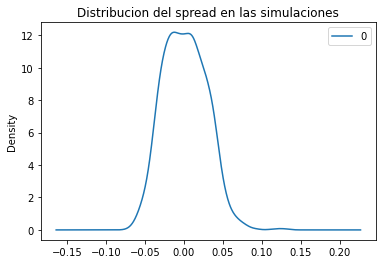

In [44]:
#intervalo 10 y vol 50%
pd.DataFrame(spreads).plot(kind='density', title='Distribucion del spread en las simulaciones')

<AxesSubplot:title={'center':'Distribucion del spread en las simulaciones'}, ylabel='Density'>

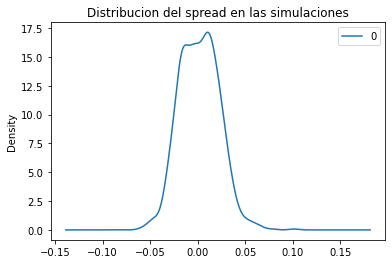

In [47]:
#intervalo 5 y vol 50%
pd.DataFrame(spreads).plot(kind='density', title='Distribucion del spread en las simulaciones')

<AxesSubplot:title={'center':'Distribucion del spread en las simulaciones - b: 10,  vol: 20%'}, ylabel='Density'>

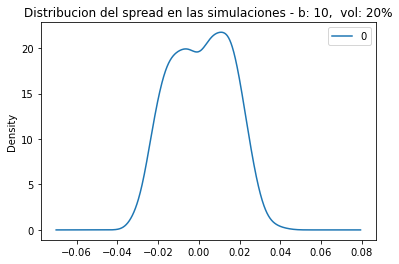

In [58]:
#intervalo 10 y vol 20%
pd.DataFrame(spreads).plot(kind='density', title='Distribucion del spread en las simulaciones - b: 10,  vol: 20%')

<AxesSubplot:title={'center':'Distribucion del spread en las simulaciones - b: 2,  vol: 20%'}, ylabel='Density'>

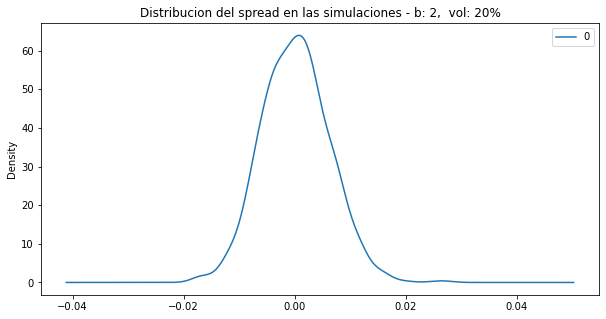

In [63]:
#intervalo 2 y vol 20%
plt.rcParams['figure.figsize'] = [10, 5]
pd.DataFrame(spreads).plot(kind='density', title='Distribucion del spread en las simulaciones - b: 2,  vol: 20%', xlabel='Diferencial')